In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
from bioinfokit.visuz import cluster
from statsmodels.graphics.mosaicplot import mosaic

In [2]:
df=pd.read_csv('mcdonalds.csv')
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [3]:
df.shape

(1453, 15)

In [4]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [5]:
md_x=np.array(df.iloc[:,0:11])
md_x=(md_x=='Yes').astype(int)
colMeans=np.round(np.mean(md_x,axis=0),2)
print(colMeans)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


C:\Users\Ayaan\AppData\Local\Temp\ipykernel_3144\790996948.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,


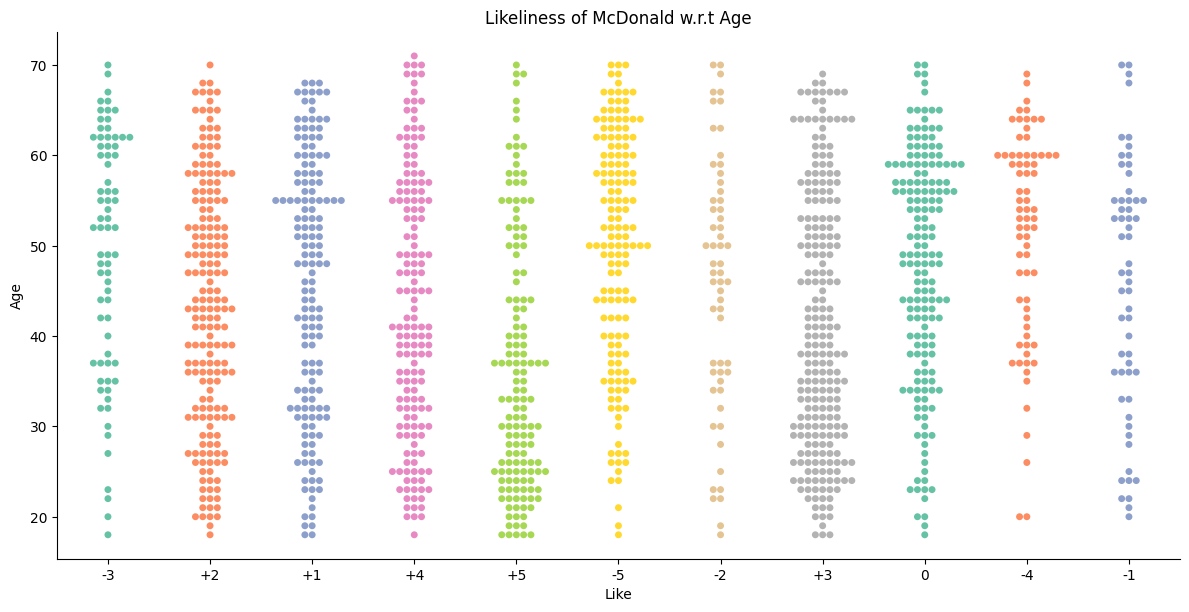

In [6]:
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height=6, aspect=2, palette="Set2",kind="swarm")
plt.title('Likeliness of McDonald w.r.t Age')
plt.show()

In [7]:
from sklearn.decomposition import PCA

pca=PCA()
p=pca.fit_transform(md_x)
print('Vaiance: ',pca.explained_variance_)
print('\nProportion of variance explained by each component: ',pca.explained_variance_ratio_)
print('\nCumulative proportion of variane explained: ',pca.explained_variance_ratio_.cumsum())
print('\nRotation matrix: ',pca.components_)

Standard Deviations:  [0.57312398 0.36900226 0.2546408  0.15904032 0.11384214 0.09627033
 0.08392454 0.07569209 0.07035814 0.06192225 0.05612296]

Proportion of variance explained by each component:  [0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variane explained:  [0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]

Rotation matrix:  [[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   

In [8]:
np.set_printoptions(precision=1)
print(p)

[[ 0.4 -0.2  0.7 ...  0.2  0.5 -0.6]
 [-0.2  0.4 -0.7 ...  0.1  0.5 -0.5]
 [ 0.4  0.7 -0.1 ... -0.3  0.1  0.2]
 ...
 [-0.2  1.1  0.2 ...  0.   0.1 -0. ]
 [-1.2 -0.   0.6 ...  0.  -0.  -0.1]
 [ 1.6  0.3 -0.  ... -0.1 -0.4 -0.5]]


Text(0, 0.5, 'PC2')

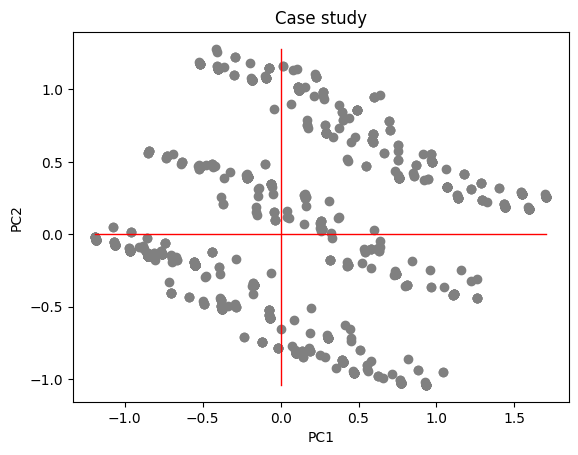

In [9]:
plt.scatter(p[:,0],p[:,1],color='grey')
plt.plot([0,0],[np.min(p[:,1]),np.max(p[:,1])],color='red',linewidth=1)
plt.plot([np.min(p[:,0]),np.max(p[:,0])],[0,0],color='red',linewidth=1)
plt.title('Case study')
plt.xlabel('PC1')
plt.ylabel('PC2')

C:\Users\Ayaan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


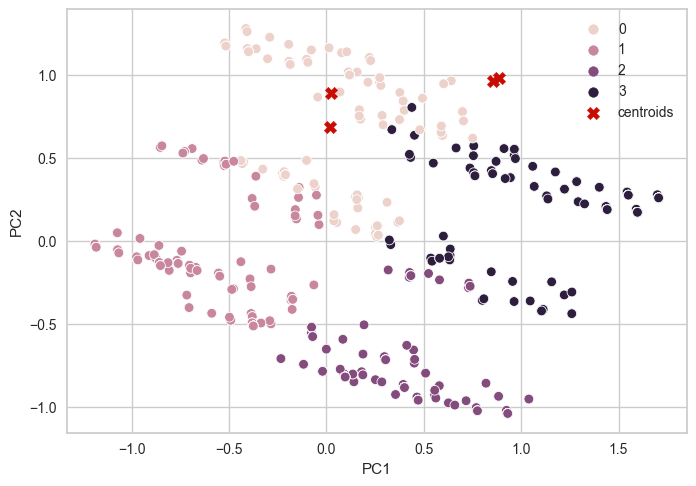

In [35]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(md_x)
names = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']
df1 = pd.DataFrame(data =p, columns = names)
sns.scatterplot(data=df1, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

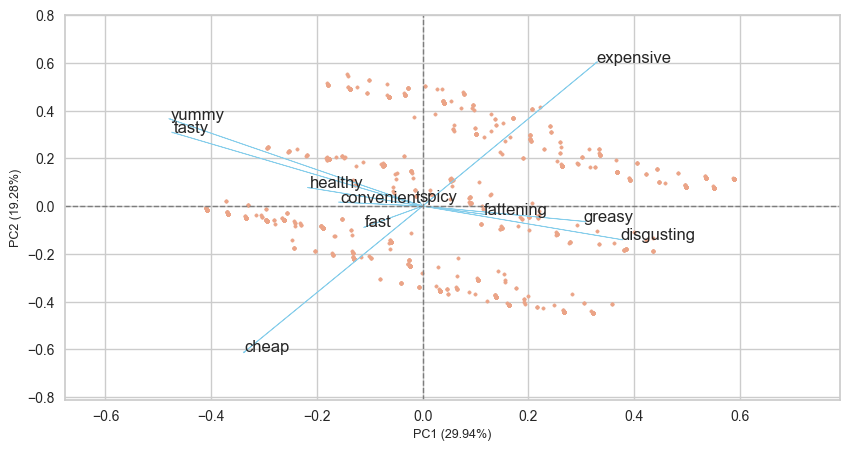

In [31]:
pca_scores =p
r = pca.components_
# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=r, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

<!-- Extracting Segments -->

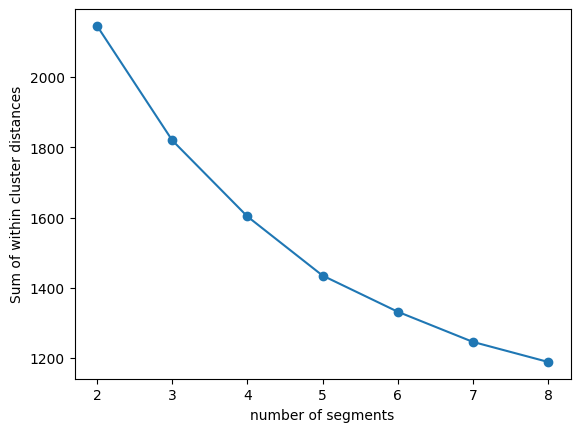

In [10]:
from sklearn.cluster import KMeans
np.random.seed(1234)
MD_kms = []
for i in range(2, 9):
    km = KMeans(n_clusters=i, n_init=10, random_state=3)
    km.fit(md_x)
    MD_kms.append(km)

plt.figure()
plt.plot(range(2, 9), [k.inertia_ for k in MD_kms], marker='o')
plt.xlabel('number of segments')
plt.ylabel('Sum of within cluster distances')
plt.show()

C:\Users\Ayaan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayaan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayaan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ayaan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

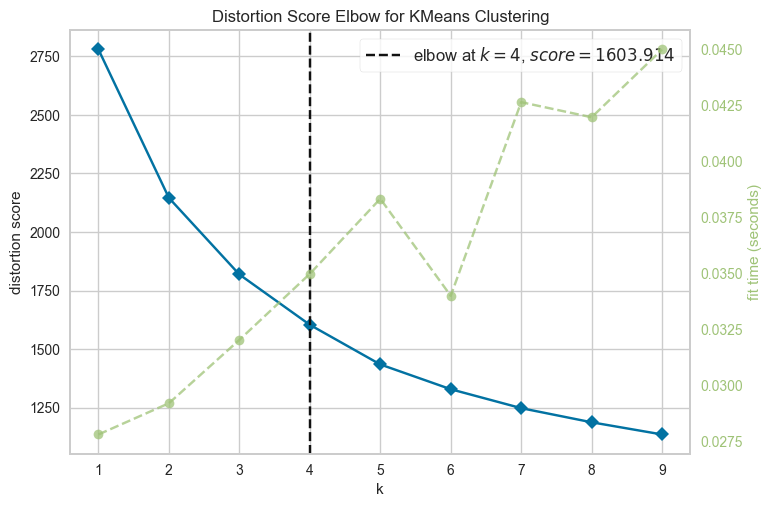

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
kmeans2 = KMeans()
visualizer = KElbowVisualizer(kmeans2, k=(1,10))
visualizer.fit(md_x)
visualizer.show()

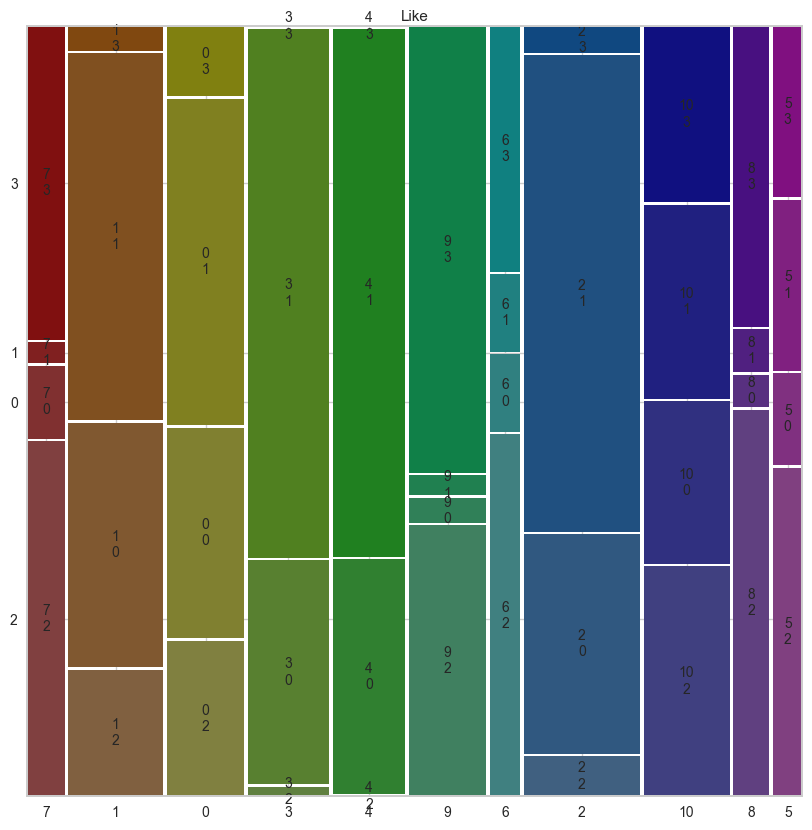

In [58]:
plt.rcParams['figure.figsize']=(10,10)
mosaic(df,['Like','cluster_num'])
plt.xlabel('Like')
plt.show()

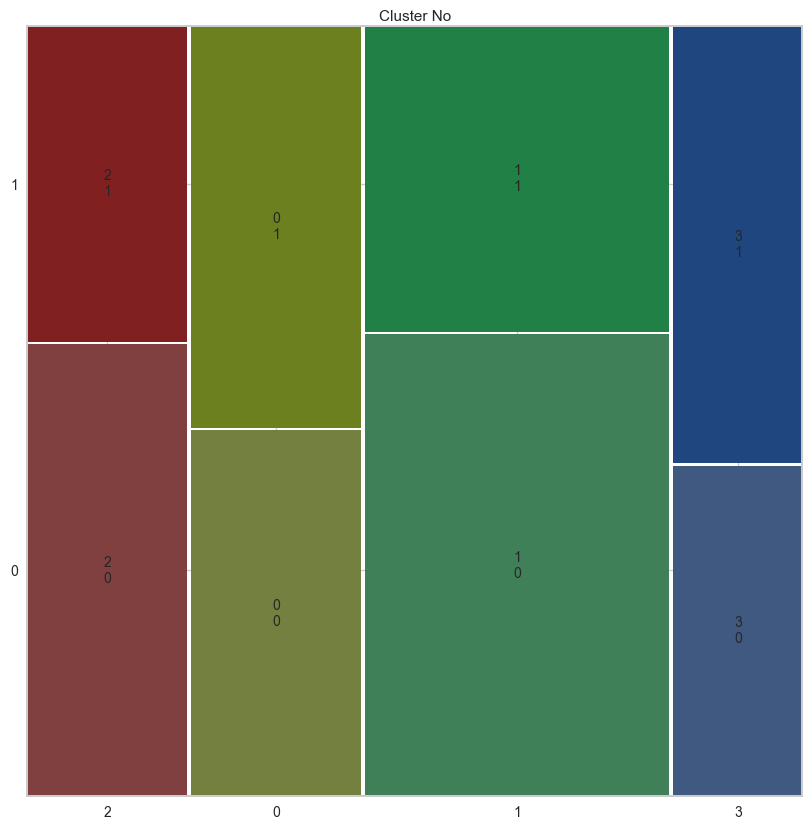

In [60]:
mosaic(df,['cluster_num','Gender'])
plt.xlabel('Cluster No')
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

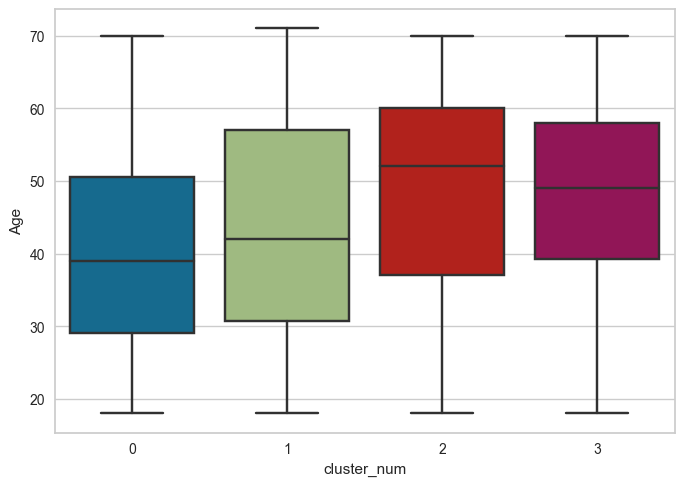

In [38]:
df['cluster_num'] = kmeans.labels_
sns.boxplot(x="cluster_num", y="Age", data=df)

In [18]:
import pandas as pd

like_table = pd.value_counts(df['Like'])
reversed_table = like_table.iloc[::-1]

print(reversed_table)


-1     58
-2     59
-4     71
-3     73
+5    143
-5    152
+1    152
+4    160
0     169
+2    187
+3    229
Name: Like, dtype: int64


In [19]:
import pandas as pd
import re

df['Like.n'] = df['Like'].apply(lambda x: int(re.search(r'\d+', str(x)).group()) if re.search(r'\d+', str(x)) else 0)
table = pd.value_counts(df['Like.n'])

print(table)


3    302
5    295
2    246
4    231
1    210
0    169
Name: Like.n, dtype: int64


In [20]:
column_names = df.columns[0:11]
f = 'Like.n ~ ' + ' + '.join(column_names)

print(f)

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [62]:
from sklearn.preprocessing import LabelEncoder
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
v = df.groupby('cluster_num')['VisitFrequency'].mean()
v = v.to_frame().reset_index()
v

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [50]:
df['Like'] = LabelEncoder().fit_transform(df['Like'])
d=df.groupby('cluster_num')['Like'].mean()
d=d.to_frame().reset_index()
d

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [54]:
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
b = df.groupby('cluster_num')['Gender'].mean()
b = b.to_frame().reset_index()
b

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [67]:
sr = b.merge(d, on='cluster_num', how='left').merge(v, on='cluster_num', how='left')
sr

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


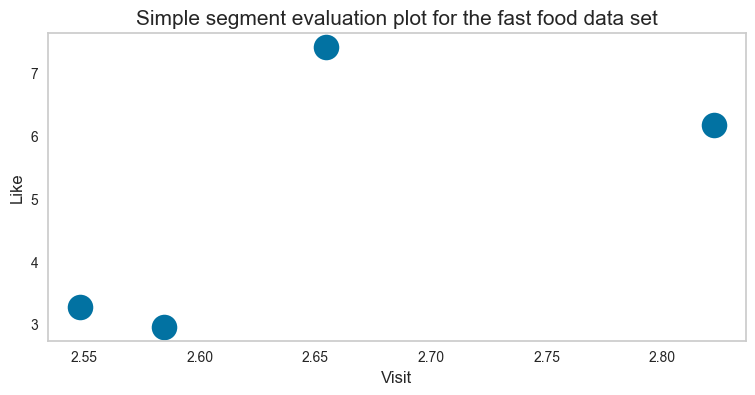

In [68]:
plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=sr,s=400, color="b")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.grid()
plt.show()